What would you like to do?
 1 : Image Watermarking 
 2 : Text Watermarking 
2
You have selected Text Watermarking.
Enter the text for the watermark: FUTURETECH.AI
Choose a font style:
1: Simplex
2: Plain
3: Duplex
4: Complex
5: Triplex
Enter your choice (1-5): 4
Enter the color for the text (BGR format):
Blue (0-255): 34
Green (0-255): 11
Red (0-255): 9


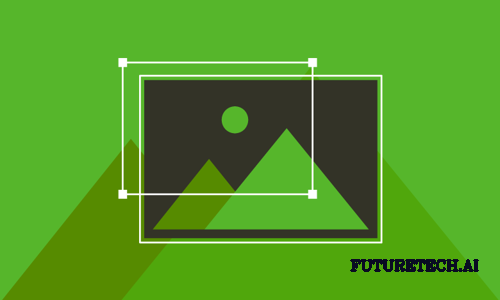

In [1]:
import requests
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

def add_logo_watermark(img, logo_path, logo_size=(50, 30), margin=10):
    """
    Adds a logo watermark to the bottom-right corner of an image.

    Parameters:
        img (PIL.Image): The base image to add the watermark.
        logo_path (str): Path to the logo image.
        logo_size (tuple): Dimensions to resize the logo.
        margin (int): Margin between the logo and the edges of the image.

    Returns:
        PIL.Image: Image with the logo watermark applied.
    """
    try:
        # Open and resize the logo
        logo = Image.open(logo_path)
        logo_resized = logo.resize(logo_size)

        # Convert images to NumPy arrays for processing
        img_logo = np.array(img.convert('RGB'))
        logo_resized = np.array(logo_resized.convert('RGB'))

        # Get dimensions of the image and logo
        h_img, w_img, _ = img_logo.shape
        h_logo, w_logo, _ = logo_resized.shape

        # Calculate position for the logo
        bottom_y = h_img - margin
        right_x = w_img - margin
        top_y = bottom_y - h_logo
        left_x = right_x - w_logo

        # Blend the logo into the specified position
        roi = img_logo[top_y:bottom_y, left_x:right_x]
        blended = cv2.addWeighted(roi, 1, logo_resized, 1, 0)
        img_logo[top_y:bottom_y, left_x:right_x] = blended

        # Convert back to a PIL.Image and return
        return Image.fromarray(img_logo)

    except Exception as e:
        print(f"Error in adding logo watermark: {e}")
        return None

def add_text_watermark(img, text, position=None, font=cv2.FONT_HERSHEY_SIMPLEX,
                       font_scale=0.5, color=(0, 0, 255), thickness=2):
    """
    Adds a text watermark to an image with customizable style and color.

    Parameters:
        img (PIL.Image): The base image to add the text watermark.
        text (str): The text to add as a watermark.
        position (tuple): Position of the text (x, y). Default is bottom-right corner.
        font (int): Font style for the text (e.g., cv2.FONT_HERSHEY_SIMPLEX).
        font_scale (float): Font size for the text.
        color (tuple): Color of the text in BGR format.
        thickness (int): Thickness of the text.

    Returns:
        PIL.Image: Image with the text watermark applied.
    """
    try:
        # Convert image to NumPy array
        img_array = np.array(img.convert('RGB'))
        h_img, w_img, _ = img_array.shape

        # Default position if not provided
        if position is None:
            position = (w_img - 150, h_img - 30)

        # Add text to the image
        cv2.putText(img_array, text, position, fontFace=font,
                    fontScale=font_scale, color=color, thickness=thickness, lineType=cv2.LINE_4)
        return Image.fromarray(img_array)
    except Exception as e:
        print(f"Error in adding text watermark: {e}")
        return None

def main():
    """
    Main function to handle user input and apply selected watermarking option.
    """
    # Load an image from a URL
    img = Image.open(requests.get(
        'https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png',
        stream=True).raw).resize((500, 300))

    try:
        # Ask the user to select watermarking type
        choice = int(input('What would you like to do?\n 1 : Image Watermarking \n 2 : Text Watermarking \n'))

        if choice == 1:
            print('You have selected Image Watermarking.')
            watermarked_img = add_logo_watermark(img, '/content/google.jpg')
            if watermarked_img:
                cv2_imshow(np.array(watermarked_img))  # Show the watermarked image
        elif choice == 2:
            print('You have selected Text Watermarking.')

            # Get the text for the watermark
            text = input('Enter the text for the watermark: ')

            # Allow the user to choose text style
            print('Choose a font style:')
            print('1: Simplex\n2: Plain\n3: Duplex\n4: Complex\n5: Triplex')
            font_choice = int(input('Enter your choice (1-5): '))

            font_styles = {
                1: cv2.FONT_HERSHEY_SIMPLEX,
                2: cv2.FONT_HERSHEY_PLAIN,
                3: cv2.FONT_HERSHEY_DUPLEX,
                4: cv2.FONT_HERSHEY_COMPLEX,
                5: cv2.FONT_HERSHEY_TRIPLEX,
            }
            font = font_styles.get(font_choice, cv2.FONT_HERSHEY_SIMPLEX)

            # Allow the user to select text color
            print('Enter the color for the text (BGR format):')
            b = int(input('Blue (0-255): '))
            g = int(input('Green (0-255): '))
            r = int(input('Red (0-255): '))
            color = (b, g, r)

            # Apply the text watermark with the selected options
            watermarked_img = add_text_watermark(img, text, font=font, color=color)
            if watermarked_img:
                cv2_imshow(np.array(watermarked_img))  # Show the text watermarked image
        else:
            print('Invalid input. Please select 1 or 2.')  # Handle invalid choices
    except ValueError:
        print('Invalid input. Please enter a number.')  # Handle non-integer inputs

if __name__ == "__main__":
    main()
